In [1]:
from MemDetect.GUV import GUV, GUVDataset
from MemDetect.MemFret import load_tif
from MemDetect.MemDetect import detect_guvs
from MemDetect.visualize import display_detections
from matplotlib import pyplot as plt
from skimage.draw import circle
import numpy as np
import os
from glob import glob

In [2]:
# Notebook configurations

EXP_DIR = '../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/'

# Analysis settings

alpha = 1.0 # determines a threshold level. Pixels above this are considered to be too high to be a valid signal (see MemDetect.py)
n = 1 # sets the threshold level for binarising confocal image
N = 10 # sets the maximum expected number of GUVs in one image. Used for nonmaximum suppression
sigma = 1 # sets level of smoothing during image gaussian noise filtering

# radii to look for during Hough transform

radii = np.arange(15,25,1)

In [3]:

dir_ = os.path.join(EXP_DIR,'Before')

In [4]:
# datasets_by_time = {}

# for dir_ in dir_list:
IMAGE_DIR = dir_

print(IMAGE_DIR)

_, name = os.path.split(IMAGE_DIR)

guv_datasetExp = GUVDataset(IMAGE_DIR)



../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/Before


(2, 512, 512)
(512, 512)
(512, 512)
256965
here
(512, 512)
(512, 512)
956
(512, 512)
(512, 512)
791
(512, 512)
(512, 512)
956
(512, 512)
(512, 512)
620
(512, 512)
(512, 512)
864
(512, 512)
(512, 512)
992
(2, 512, 512)
(512, 512)
(512, 512)
258140
here
(512, 512)
(512, 512)
660
(512, 512)
(512, 512)
620
(512, 512)
(512, 512)
864
(512, 512)
(512, 512)
620
(512, 512)
(512, 512)
620
(512, 512)
(512, 512)
620
(2, 512, 512)
(512, 512)
(512, 512)
259168
here
(512, 512)
(512, 512)
992
(512, 512)
(512, 512)
992
(512, 512)
(512, 512)
992
(2, 512, 512)
(512, 512)
(512, 512)
258548
here
(512, 512)
(512, 512)
992
(512, 512)
(512, 512)
992
(512, 512)
(512, 512)
620
(512, 512)
(512, 512)
992
(2, 512, 512)
(512, 512)
(512, 512)
259464
here
(512, 512)
(512, 512)
864
(512, 512)
(512, 512)
992
(512, 512)
(512, 512)
824
(2, 512, 512)
(512, 512)
(512, 512)
256972
here
(512, 512)
(512, 512)
956
(512, 512)
(512, 512)
992
(512, 512)
(512, 512)
620
(512, 512)
(512, 512)
992
(512, 512)
(512, 512)
620
(512, 512)

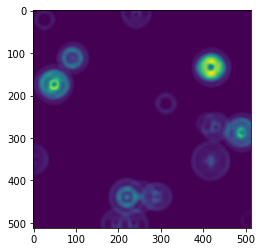

In [7]:
membrane_intensities={}
guv_radii = {}


 # get tifs
tif_paths = glob(os.path.join(dir_,'tifs/*.tif'))

for i,path in enumerate(tif_paths):
    
    images, tif_name = load_tif(path)
    print(images.shape)
    detections_img = detect_guvs(images[1],tif_name,radii,N,n)
    for _id in np.unique(detections_img):
        #  membrane_intensities[frame+'_'+str(_id)] = [np.mean(images[0][detections_img==_id]),np.mean(images[1][detections_img == _id])]

        print(images[0].shape)
        print((detections_img==_id).shape)
        print(images[0][detections_img==_id].shape[0])
        if images[0][detections_img==_id].shape[0] > 5000:
            print('here')
            continue

        #guv_radii[frame+'_'+str(_id)] = len(detections_img[detections_img==_id])/(2*np.pi)
        #membrane_intensities[frame+'_'+str(_id)]=np.array([images[0][detections_img==_id],images[1][detections_img == _id]])
        guv_radius = len(detections_img[detections_img==_id])/(6*2*np.pi)
        membrane_i_ch1 = images[0][detections_img==_id]
        membrane_i_ch2 = images[1][detections_img == _id]

        guv = GUV(tif_name,i,membrane_i_ch1,membrane_i_ch2,guv_radius,in_img_id = _id)


        guv_datasetExp.add_guv(guv)
        guv_datasetExp.add_detection_map(detections_img,i)

In [8]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (40,20)
from ipywidgets import interactive,fixed

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


interactive(children=(Dropdown(description='map_id', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

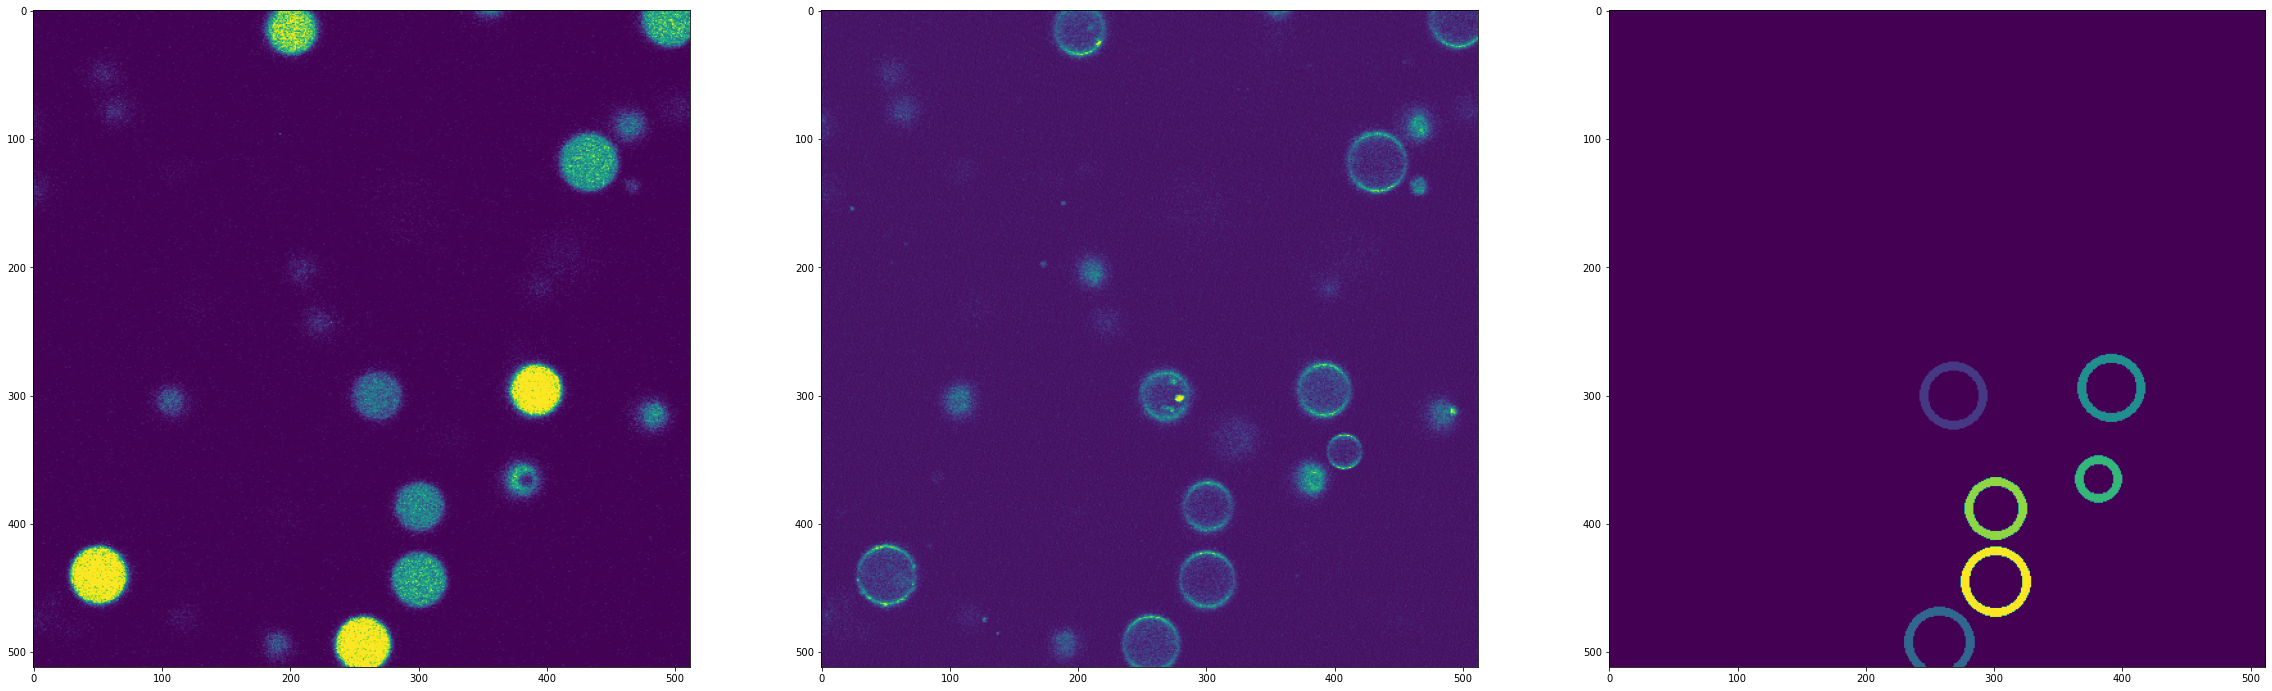

In [9]:
#create ranges for slide bar

map_rng = list(guv_datasetExp.detection_maps.keys())

print(map_rng)

interactive_plot = interactive(display_detections,map_id = map_rng, guv_dataset = fixed(guv_datasetExp),IMAGE_DIR = fixed(IMAGE_DIR))
output = interactive_plot.children[-1]
interactive_plot

In [12]:
guv_datasetExp.guvs.keys()

dict_keys(['7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146'])

In [13]:
#load the dataset

#guv_dataset = datasets_by_time[ID]

misdetection_ids = np.array([14,18,16,13,28,31,35,51,55,57,61,63,65,67,73,87,91,100,96,109,118,123,126,124])
# misdetection_ids = np.arange(1,7)
for _id in misdetection_ids:
    guv_datasetExp.delete_guv(str(_id))

In [25]:
def fillinGUVs(guv_dataset):
    
    for guv in guv_dataset.guvs.keys():
        centre = guv_dataset.get_guv_position(guv)
        radius = guv_dataset.guvs[guv].radius # due to dilation and the way the radius is determined it is overestimated. This should be fixed
        
        circle_coords = circle(centre[0],centre[1],radius)
        
        guv_dataset.guvs[guv].internal_coords = circle_coords
        
    return guv_dataset

In [39]:
def get_mean_I(guv_dataset, dir_):
    
    # average FRET over the projected  area of the encapsulated volume of the GUV.
    # we store this with reference to the GUV id for debugging and for visualisation
    
    
    internal_I = {}
    
    
    for guv_id in guv_dataset.guvs.keys():
        
        # load correct image
        tif_name = guv_dataset.guvs[guv_id].image_id
        
        tif_path = os.path.join(dir_,'tifs')
        tif_path = os.path.join(tif_path,tif_name)
#         print(tif_path)
        images, tif_id = load_tif(tif_path)
        
        
        
        mean_guv_I = np.nanmean(images[0][guv_dataset.guvs[guv_id].internal_coords])
        
        internal_I[guv_id] = mean_guv_I
        
    return internal_I

    

In [38]:
calcein_Is = get_mean_I(guv_datasetExp,dir_)

../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/Before/tifs/Image0010.tif
../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/Before/tifs/Image0010.tif
../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/Before/tifs/Image0010.tif
../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/Before/tifs/Image0010.tif
../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/Before/tifs/Image0010.tif
../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/Before/tifs/Image0010.tif
../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/Before/tifs/Image0002.tif
../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/Before/tifs/Image0002.tif
../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/Before/tifs/Image0030.tif
../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/Before/tifs/Image0030.tif
../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/Before/tifs/Image0030.tif
../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/Before/tifs/Image0016.tif
../20210108_Ompf_charge_medi

In [41]:
calcein_Is_data = np.array(list(calcein_Is.values()))

(array([16.,  9., 10., 14., 24., 14.,  7.,  7., 11.,  4.]),
 array([ 152.96361431,  446.93233688,  740.90105946, 1034.86978203,
        1328.8385046 , 1622.80722717, 1916.77594974, 2210.74467231,
        2504.71339489, 2798.68211746, 3092.65084003]),
 <BarContainer object of 10 artists>)

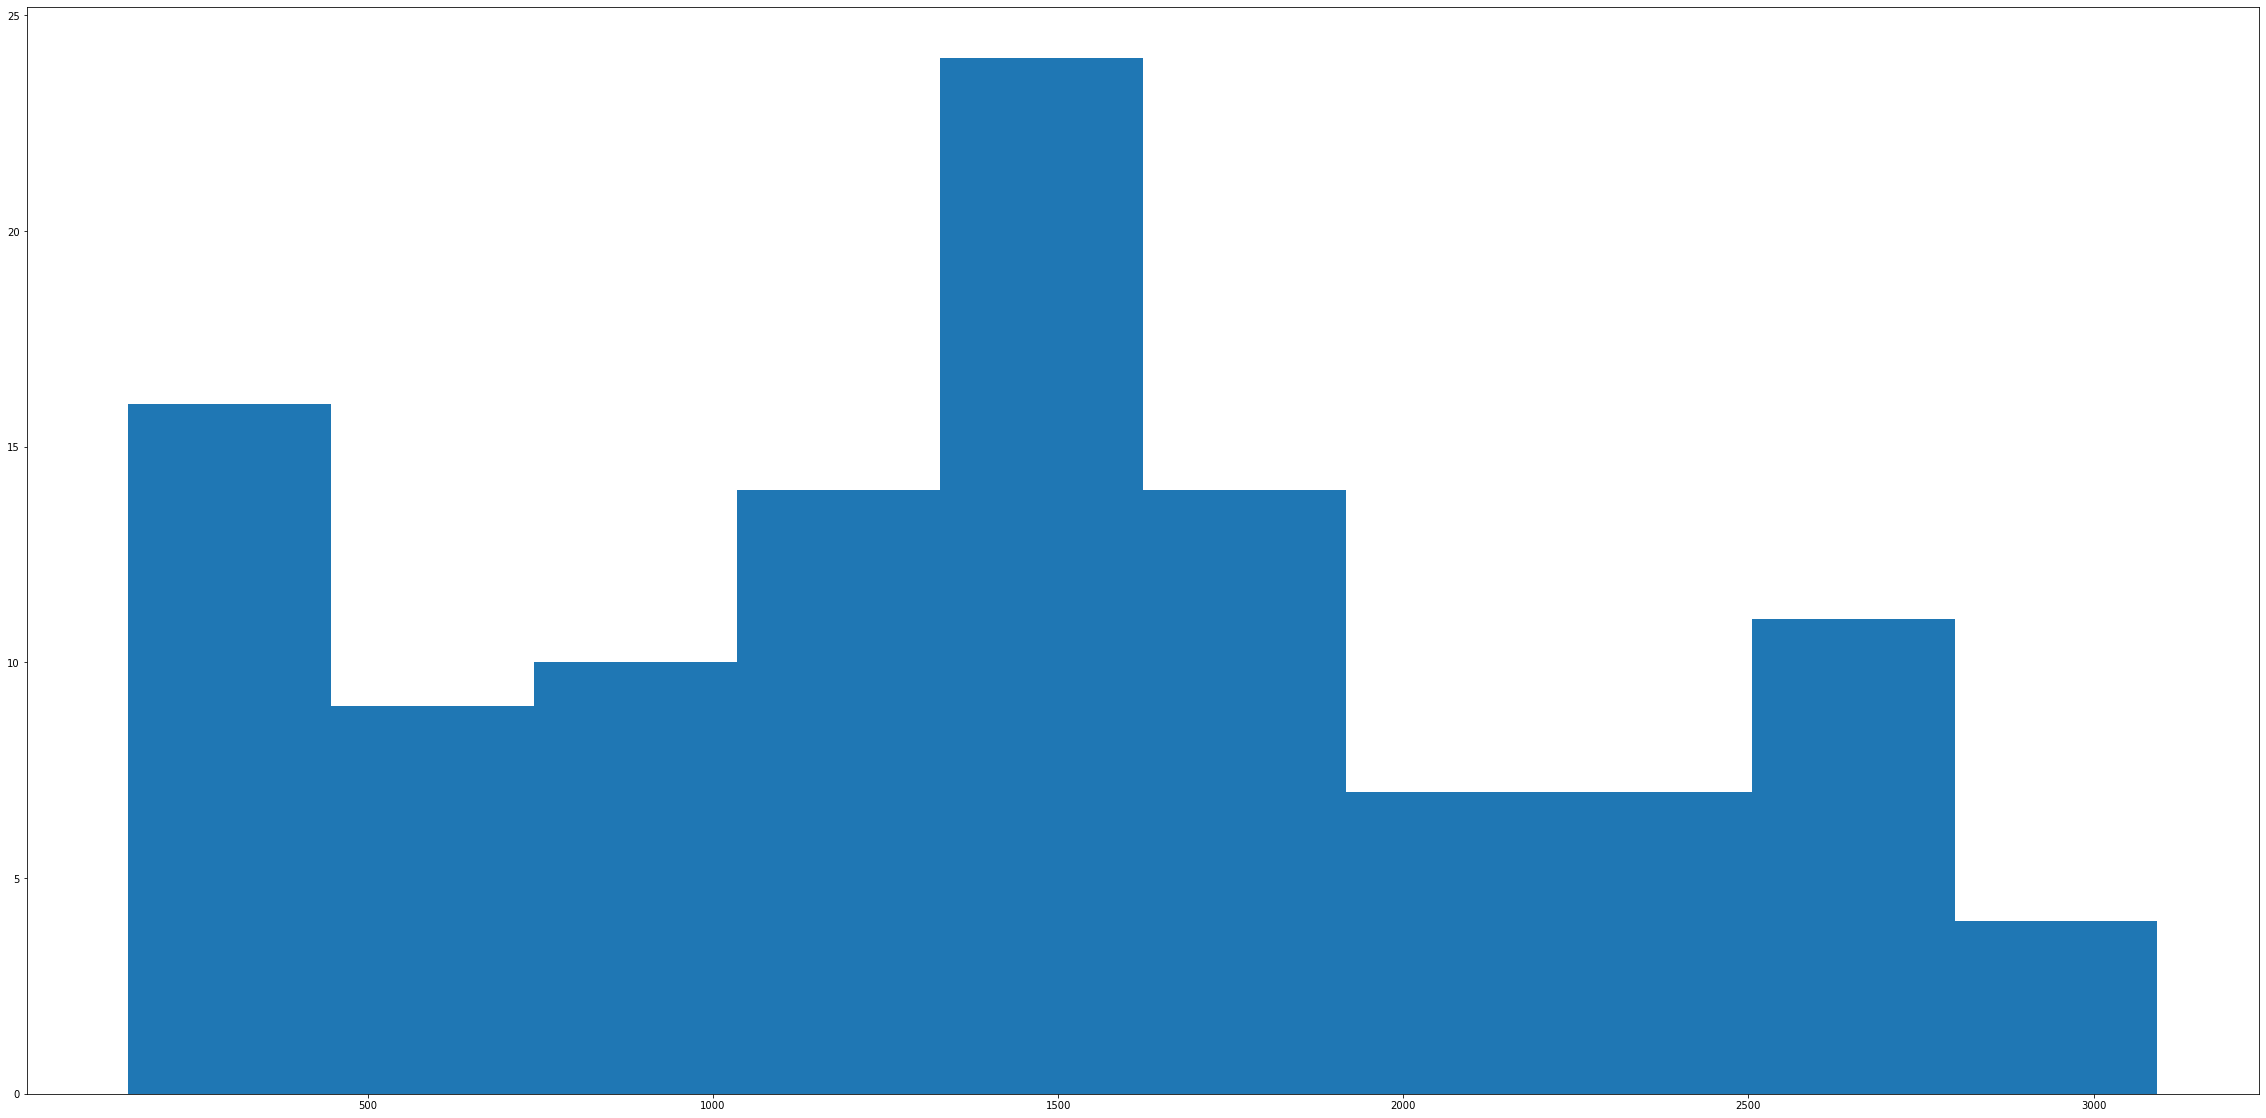

In [43]:
plt.hist(calcein_Is_data)

In [44]:
after_dir = os.path.join(EXP_DIR,'CobaltAssay')

In [51]:


# for dir_ in dir_list:
IMAGE_DIR = after_dir

print(IMAGE_DIR)

_, name = os.path.split(IMAGE_DIR)

guv_datasetAfter= GUVDataset(IMAGE_DIR)



../20210108_Ompf_charge_mediated_fusion_calcein_cobalt/CobaltAssay


(2, 512, 512)
(512, 512)
(512, 512)
257411
here
(512, 512)
(512, 512)
620
(512, 512)
(512, 512)
660
(512, 512)
(512, 512)
696
(512, 512)
(512, 512)
620
(512, 512)
(512, 512)
788
(512, 512)
(512, 512)
653
(512, 512)
(512, 512)
696
(2, 512, 512)
(512, 512)
(512, 512)
259576
here
(512, 512)
(512, 512)
916
(512, 512)
(512, 512)
864
(512, 512)
(512, 512)
788
(2, 512, 512)
(512, 512)
(512, 512)
257663
here
(512, 512)
(512, 512)
758
(512, 512)
(512, 512)
660
(512, 512)
(512, 512)
620
(512, 512)
(512, 512)
613
(512, 512)
(512, 512)
966
(512, 512)
(512, 512)
864
(2, 512, 512)
(512, 512)
(512, 512)
255671
here
(512, 512)
(512, 512)
956
(512, 512)
(512, 512)
956
(512, 512)
(512, 512)
956
(512, 512)
(512, 512)
992
(512, 512)
(512, 512)
696
(512, 512)
(512, 512)
992
(512, 512)
(512, 512)
925
(2, 512, 512)
(512, 512)
(512, 512)
259836
here
(512, 512)
(512, 512)
916
(512, 512)
(512, 512)
696
(512, 512)
(512, 512)
696
(2, 512, 512)
(512, 512)
(512, 512)
258321
here
(512, 512)
(512, 512)
944
(512, 512)

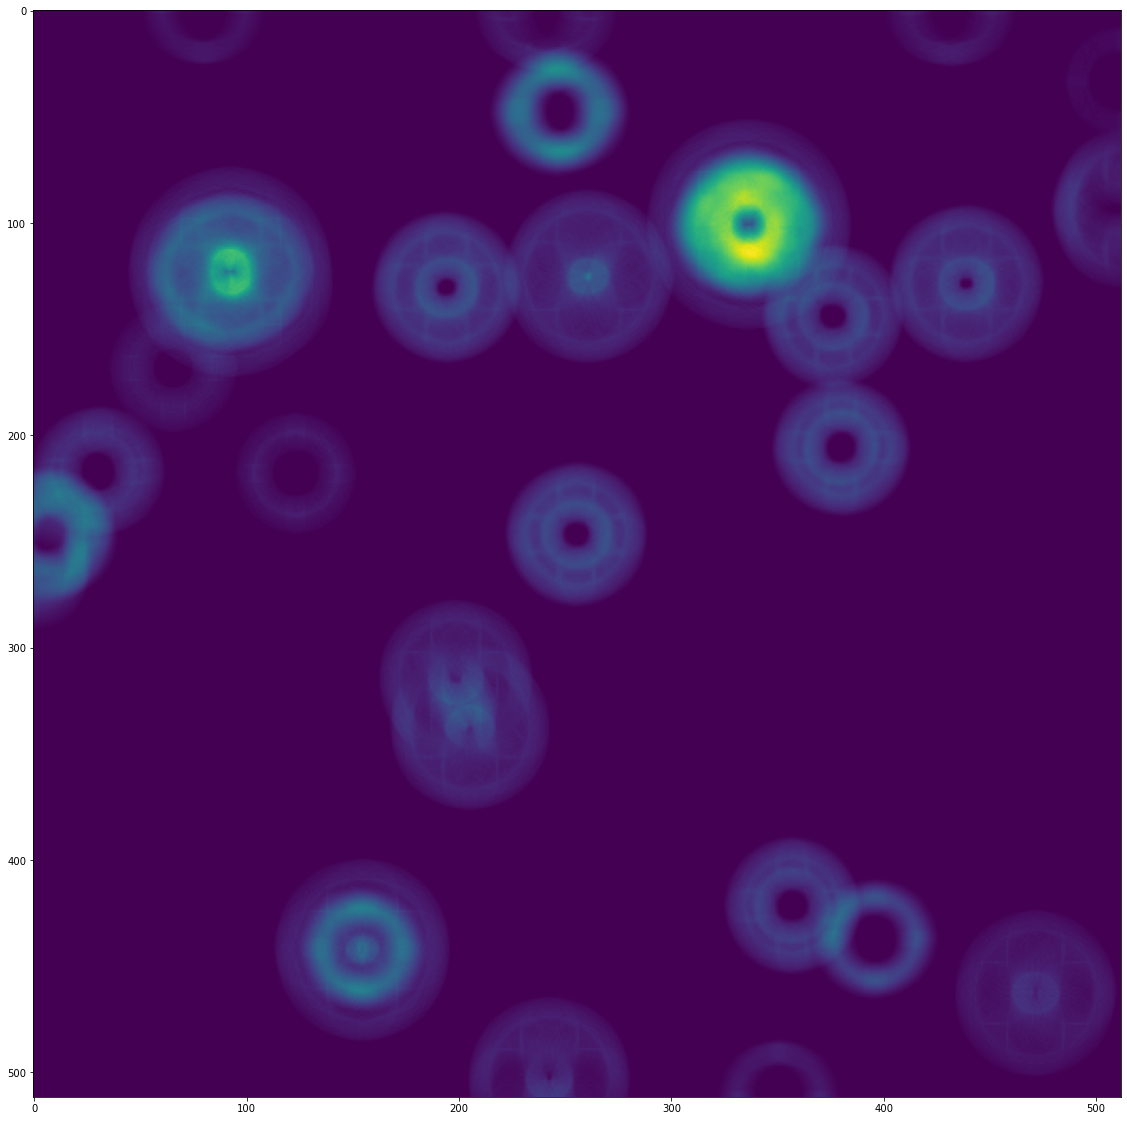

In [52]:
membrane_intensities_after={}
guv_radii_after = {}


 # get tifs
tif_paths = glob(os.path.join(after_dir,'tifs/*.tif'))

for i,path in enumerate(tif_paths):
    
    images, tif_name = load_tif(path)
    print(images.shape)
    detections_img = detect_guvs(images[1],tif_name,radii,N,n)
    for _id in np.unique(detections_img):
        #  membrane_intensities[frame+'_'+str(_id)] = [np.mean(images[0][detections_img==_id]),np.mean(images[1][detections_img == _id])]

        print(images[0].shape)
        print((detections_img==_id).shape)
        print(images[0][detections_img==_id].shape[0])
        if images[0][detections_img==_id].shape[0] > 5000:
            print('here')
            continue

        #guv_radii[frame+'_'+str(_id)] = len(detections_img[detections_img==_id])/(2*np.pi)
        #membrane_intensities[frame+'_'+str(_id)]=np.array([images[0][detections_img==_id],images[1][detections_img == _id]])
        guv_radius = len(detections_img[detections_img==_id])/(6*2*np.pi)
        membrane_i_ch1 = images[0][detections_img==_id]
        membrane_i_ch2 = images[1][detections_img == _id]

        guv = GUV(tif_name,i,membrane_i_ch1,membrane_i_ch2,guv_radius,in_img_id = _id)


        guv_datasetAfter.add_guv(guv)
        guv_datasetAfter.add_detection_map(detections_img,i)

In [53]:
#create ranges for slide bar

map_rng = list(guv_datasetAfter.detection_maps.keys())

print(map_rng)

interactive_plot = interactive(display_detections,map_id = map_rng, guv_dataset = fixed(guv_datasetAfter),IMAGE_DIR = fixed(IMAGE_DIR))
output = interactive_plot.children[-1]
interactive_plot

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


interactive(children=(Dropdown(description='map_id', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

In [55]:
#guv_dataset = datasets_by_time[ID]

misdetection_ids = np.array([11,23,25,26,28,30,33,38,39,40,45,47,54,59,64,70,86,118,130,132,142])
# misdetection_ids = np.arange(1,7)
for _id in misdetection_ids:
    guv_datasetAfter.delete_guv(str(_id))

In [57]:
guv_datasetAfter = fillinGUVs(guv_datasetAfter)
calcein_Is_after = get_mean_I(guv_datasetAfter,after_dir)
calcein_Is_after_data = np.array(list(calcein_Is_after.values()))

In [64]:
%matplotlib qt


fig, ax = plt.subplots(1,1)

ax.hist(calcein_Is_data,15)
ax.hist(calcein_Is_after_data)
plt.xlabel('Calcein Fluorescence [a.u]',fontsize = 15)
plt.ylabel('No. of GUVs')

plt.xticks([0,1000,2000,3000], fontsize = 15)
plt.yticks([20,40,60,80],fontsize = 15)

#legend

legend = ['Before','After']
plt.legend(legend,fontsize = 15)

plt.title('Cobalt transport across OmpF inserted GUVs',fontsize = 18)

Text(0.5, 1.0, 'Cobalt transport across OmpF inserted GUVs')